<a href="https://colab.research.google.com/github/ritaxtii/1D_1_Profund/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 52.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensor

In [1]:
#Array, image processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
#from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# io
import glob
import pathlib
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [4]:
!unzip "/content/face_mini.zip" -d "/content/face_mini/"

Archive:  /content/face_mini.zip
   creating: /content/face_mini/Aaron_Eckhart/
  inflating: /content/face_mini/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: /content/face_mini/Aaron_Guiel/
  inflating: /content/face_mini/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: /content/face_mini/Aaron_Patterson/
  inflating: /content/face_mini/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: /content/face_mini/Aaron_Peirsol/
  inflating: /content/face_mini/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: /content/face_mini/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: /content/face_mini/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  inflating: /content/face_mini/Aaron_Peirsol/Aaron_Peirsol_0004.jpg  
   creating: /content/face_mini/Aaron_Pena/
  inflating: /content/face_mini/Aaron_Pena/Aaron_Pena_0001.jpg  
   creating: /content/face_mini/Aaron_Sorkin/
  inflating: /content/face_mini/Aaron_Sorkin/Aaron_Sorkin_0001.jpg  
  inflating: /content/face_mini/Aaron_Sorkin/Aaron_Sorkin_

In [5]:
mini_face=glob.glob ("/content/face_mini/*/*.jpg")

image_arrays = []

for file in mini_face:
    try:
        img = load_img(file, target_size=(100, 100), interpolation='bilinear')
        img_array = img_to_array(img)
        image_arrays.append(img_array)
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการโหลดไฟล์ {file}: {str(e)}")

# ตรวจสอบจำนวนภาพที่โหลด
num_images = len(image_arrays)
print(f"จำนวนภาพที่โหลด: {num_images}")

จำนวนภาพที่โหลด: 3203


In [6]:
normalized_images = [img / 255.0 for img in image_arrays]
train_x, test_x = train_test_split(normalized_images, random_state=42, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=42, test_size=0.2)

In [62]:
noise_mean = 0
noise_std = 1
noise_factor = 0.3
train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )

train_x_noise_1_01 = train_x + (0.1 * np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )
train_x_noise_1_05 = train_x + (0.5* np.random.normal(loc=noise_mean, scale=noise_std, size=(100,100,3)) )


In [63]:
train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

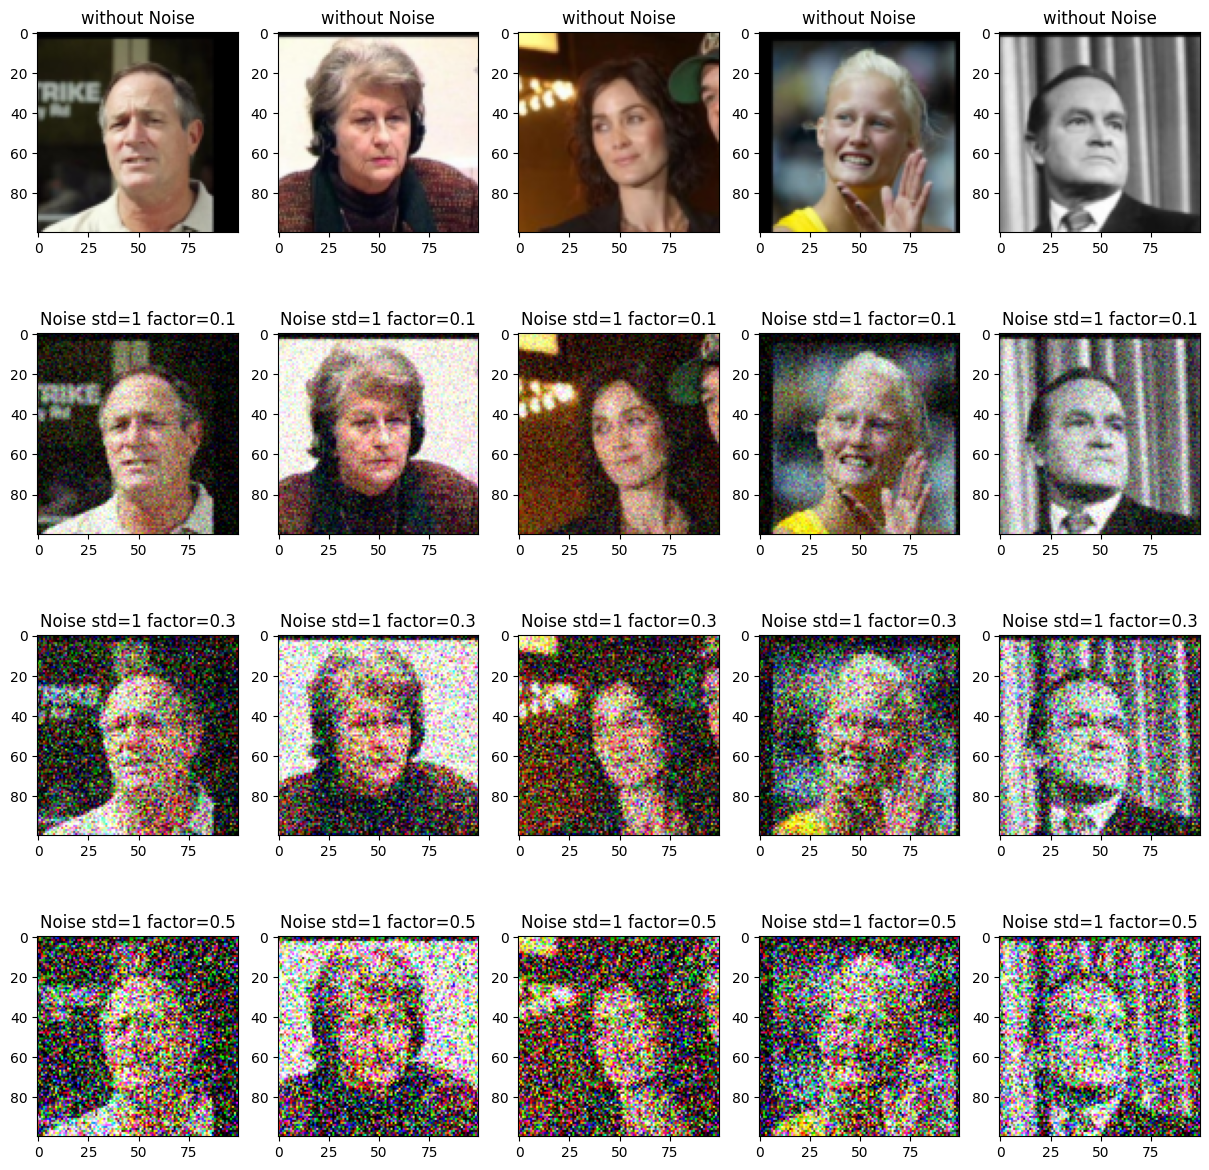

In [64]:
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(4, 5, i + 11)
    plt.imshow(train_x_noise[i])
    plt.title("Noise std=1 factor=0.3")
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_x[i])
    plt.title("without Noise")
    plt.subplot(4, 5, i + 6)
    plt.imshow(train_x_noise_1_01[i])
    plt.title("Noise std=1 factor=0.1")
    plt.subplot(4, 5, i + 16)
    plt.imshow(train_x_noise_1_05[i])
    plt.title("Noise std=1 factor=0.5")
plt.show()

--------------Lab 4.2--------------







In [65]:
from keras import Model, Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [66]:

input_img = Input(shape=(100, 100, 3))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
x6 = UpSampling2D((2, 2))(x5)
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)
# Create the Autoencoder model
autoencoder = Model(input_img, x9)
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_245 (Conv2D)         (None, 100, 100, 256)     7168      
                                                                 
 conv2d_246 (Conv2D)         (None, 100, 100, 128)     295040    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_247 (Conv2D)         (None, 50, 50, 64)        73792     
                                                                 
 conv2d_248 (Conv2D)         (None, 50, 50, 64)        36928     
                                                          

Epoch 1/16
15/15 [==============================] - 6s 191ms/step - loss: 0.0648 - val_loss: 0.0200
Epoch 2/16
15/15 [==============================] - 2s 129ms/step - loss: 0.0167 - val_loss: 0.0142
Epoch 3/16
15/15 [==============================] - 2s 129ms/step - loss: 0.0120 - val_loss: 0.0102
Epoch 4/16
15/15 [==============================] - 2s 129ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 5/16
15/15 [==============================] - 2s 130ms/step - loss: 0.0068 - val_loss: 0.0060
Epoch 6/16
15/15 [==============================] - 2s 130ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 7/16
15/15 [==============================] - 2s 130ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 8/16
15/15 [==============================] - 2s 130ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 9/16
15/15 [==============================] - 2s 130ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 10/16
15/15 [==============================] - 2s 129ms/step - loss: 0.0036 - val_loss: 0.0041

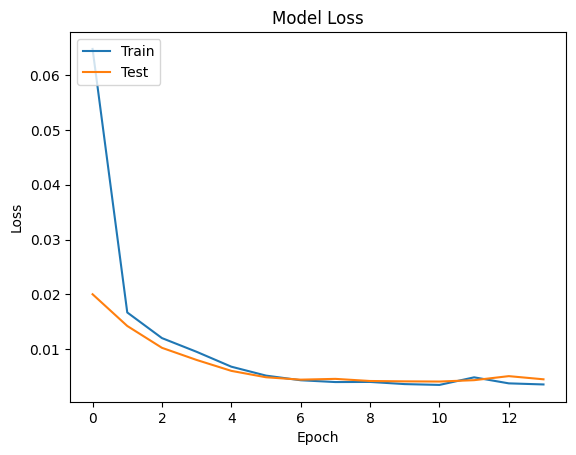

In [40]:
# Early stopping callback
callback = EarlyStopping(monitor='loss', patience=3)

# Fit the Autoencoder model
history = autoencoder.fit(train_x_noise, train_x,
                              epochs=16,
                              batch_size=128,
                              shuffle=True,
                              validation_data=(val_x_noise, val_x),
                              callbacks=[callback])

    # Test the Autoencoder model
predictions_test = autoencoder.predict(test_x_noise)

# View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 1/16
29/29 [==============================] - 3s 78ms/step - loss: 0.0531 - val_loss: 0.0139
Epoch 2/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0112 - val_loss: 0.0087
Epoch 3/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0067 - val_loss: 0.0050
Epoch 4/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 5/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0037 - val_loss: 0.0047
Epoch 7/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 8/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 9/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 10/16
29/29 [==============================] - 2s 69ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 11/

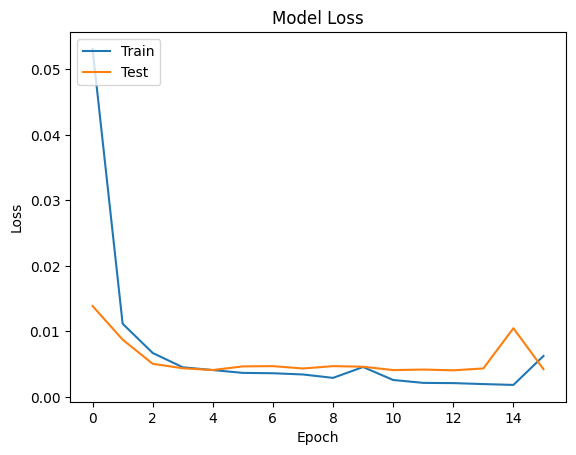

In [67]:
# Early stopping callback
callback = EarlyStopping(monitor='loss', patience=3)

# Fit the Autoencoder model
history = autoencoder.fit(train_x_noise, train_x,
                              epochs=16,
                              batch_size=64,
                              shuffle=True,
                              validation_data=(val_x_noise, val_x),
                              callbacks=[callback])

    # Test the Autoencoder model
predictions_test = autoencoder.predict(test_x_noise)

# View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


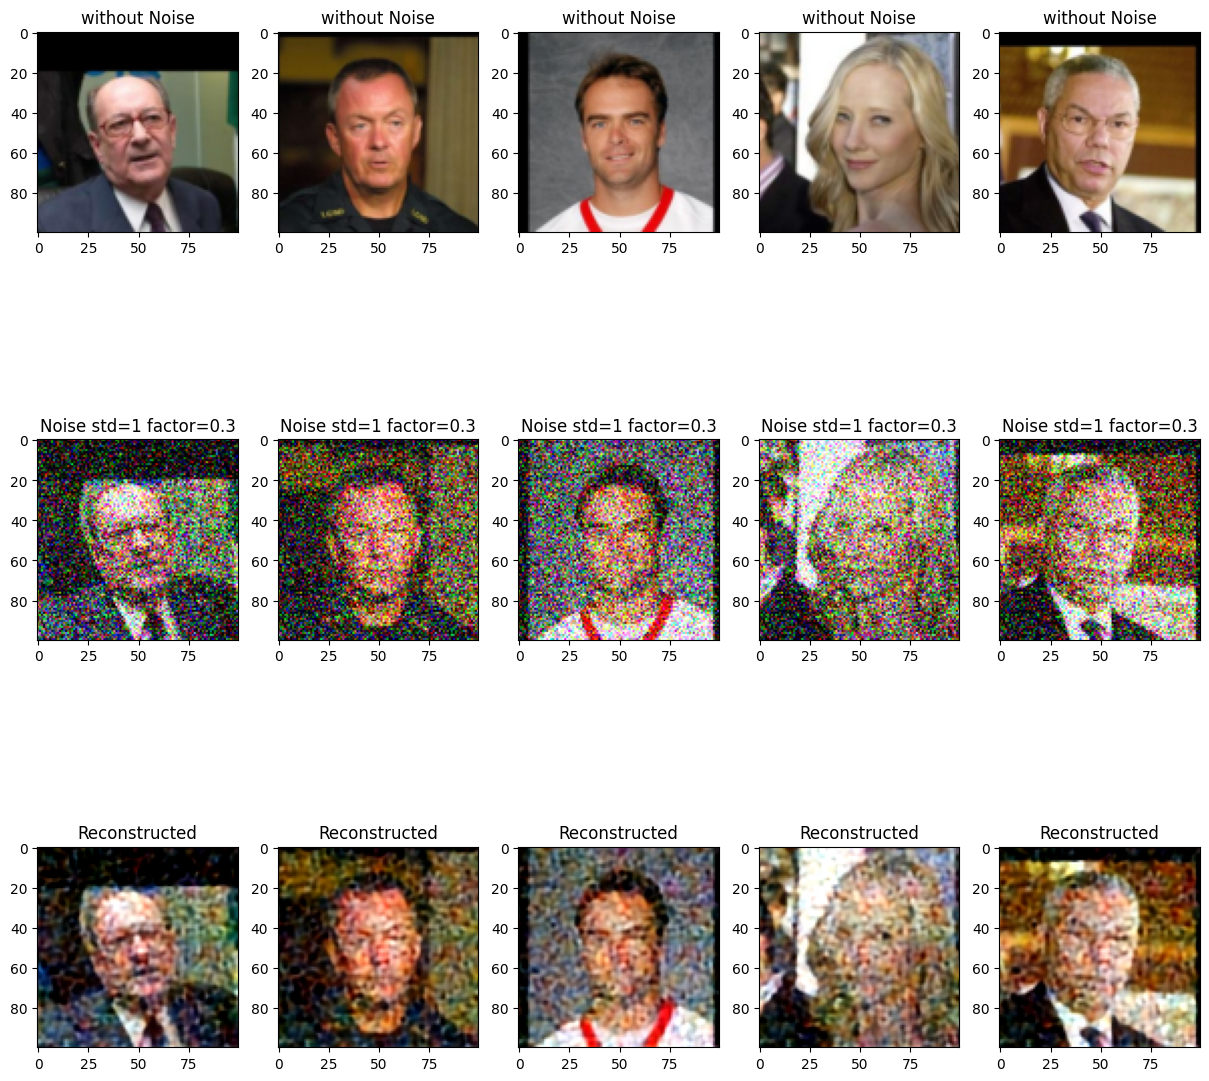

In [138]:
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(3, 5, i + 6)
    plt.imshow(test_x_noise[i])
    plt.title("Noise std=1 factor=0.3")
    plt.subplot(3, 5, i + 1)
    plt.imshow(test_x[i])
    plt.title("without Noise")
    plt.subplot(3, 5, i + 11)
    plt.imshow(predictions_test[i])
    plt.title("Reconstructed")
plt.show()

In [132]:
from keras.models import Sequential
def create_autoencoder(optimizer, learning_rate, batch_size, epochs):
    model = Sequential()
    input_img = Input(shape = (100,100,3))
    # Layer 1
    x1 = Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3))(input_img)

    # Layer 2
    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
    x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

    # Layer 3
    x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

    # Layer 4
    x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

    x6 = UpSampling2D((2, 2))(x5)

    x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)

    x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

    x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)
    model = Model(input_img,x9)
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

In [55]:
print(len(train_x_noise))

1793


In [133]:

from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_autoencoder, epochs=2, batch_size=16, verbose=0)
opts = ['adam', 'sgd']  # Add more optimizers as needed
lnR = [0.001]  # Learning rates to experiment with
bs = [16, 32]  # Batch sizes to experiment with
eps = [150, 300]  # Number of epochs to experiment with


param_grid = dict(batch_size=bs, epochs=eps, optimizer=opts, learning_rate=lnR)

grid = GridSearchCV(estimator=model, verbose=10,cv=2, param_grid=param_grid)

# Run the grid search
grid_result = grid.fit(train_x_noise, train_x)

# Display the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Display mean and standard deviation of scores for each set of hyperparameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Mean: {mean}, Std: {std}, Params: {param}")

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START batch_size=16, epochs=150, learning_rate=0.001, optimizer=adam
[CV 1/2; 1/8] END batch_size=16, epochs=150, learning_rate=0.001, optimizer=adam;, score=-0.000 total time= 2.8min
[CV 2/2; 1/8] START batch_size=16, epochs=150, learning_rate=0.001, optimizer=adam
[CV 2/2; 1/8] END batch_size=16, epochs=150, learning_rate=0.001, optimizer=adam;, score=-0.001 total time= 2.8min
[CV 1/2; 2/8] START batch_size=16, epochs=150, learning_rate=0.001, optimizer=sgd
[CV 1/2; 2/8] END batch_size=16, epochs=150, learning_rate=0.001, optimizer=sgd;, score=-0.005 total time= 2.7min
[CV 2/2; 2/8] START batch_size=16, epochs=150, learning_rate=0.001, optimizer=sgd
[CV 2/2; 2/8] END batch_size=16, epochs=150, learning_rate=0.001, optimizer=sgd;, score=-0.004 total time= 2.8min
[CV 1/2; 3/8] START batch_size=16, epochs=300, learning_rate=0.001, optimizer=adam
[CV 1/2; 3/8] END batch_size=16, epochs=300, learning_rate=0.001, opt

In [139]:

input_img2 = Input(shape=(100, 100, 3))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img2)
# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
x6 = UpSampling2D((2, 2))(x5)
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)
# Create the Autoencoder model
autoencoder2 = Model(input_img2, x9)
# Compile the model
autoencoder2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder2.summary()


Model: "model_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_124 (InputLayer)      [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_1218 (Conv2D)        (None, 100, 100, 256)     7168      
                                                                 
 conv2d_1219 (Conv2D)        (None, 100, 100, 128)     295040    
                                                                 
 max_pooling2d_174 (MaxPooli  (None, 50, 50, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_1220 (Conv2D)        (None, 50, 50, 64)        73792     
                                                                 
 conv2d_1221 (Conv2D)        (None, 50, 50, 64)        36928     
                                                          

Epoch 1/300
113/113 [==============================] - 3s 25ms/step - loss: 0.0233 - val_loss: 0.0045
Epoch 2/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 3/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 4/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 5/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0017 - val_loss: 0.0067
Epoch 6/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 7/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 8/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0015 - val_loss: 0.0066
Epoch 9/300
113/113 [==============================] - 3s 23ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 10/300
113/113 [==============================] - 3s 23ms/step - loss: 0.001

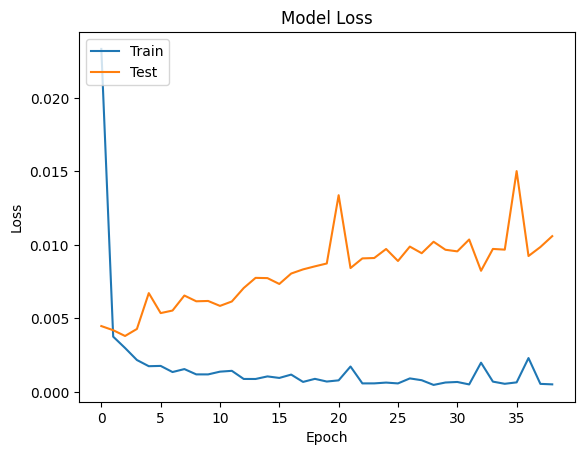

In [140]:
# Early stopping callback
callback2 = EarlyStopping(monitor='loss', patience=10)

# Fit the Autoencoder model
history = autoencoder2.fit(train_x_noise, train_x,
                              epochs=300,
                              batch_size=16,
                              shuffle=True,
                              validation_data=(val_x_noise, val_x),
                              callbacks=[callback2])

    # Test the Autoencoder model
predictions_test2 = autoencoder2.predict(test_x_noise)

# View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


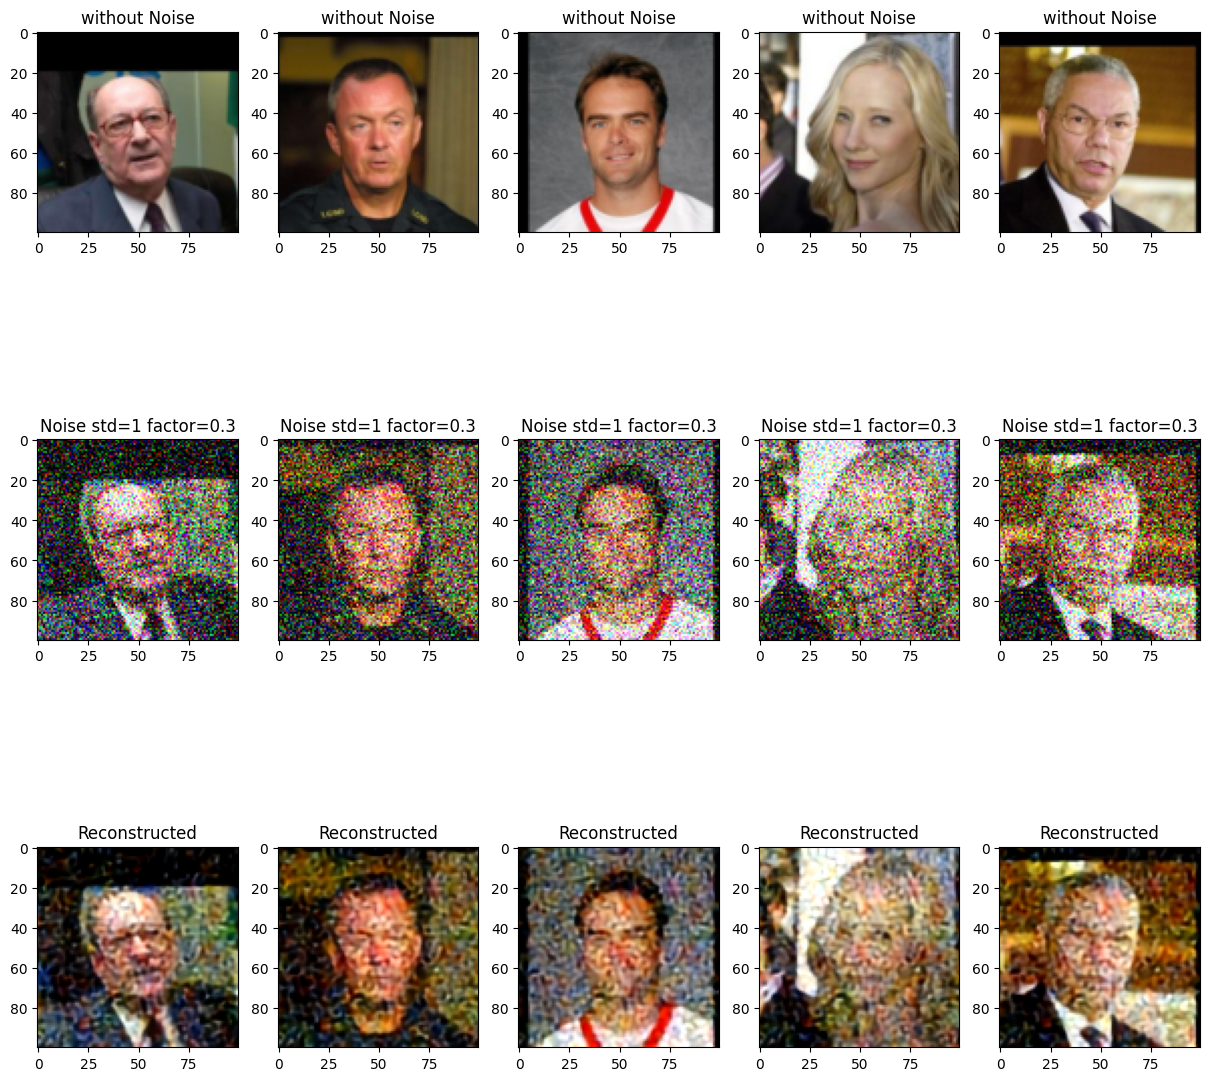

In [141]:
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(3, 5, i + 6)
    plt.imshow(test_x_noise[i])
    plt.title("Noise std=1 factor=0.3")
    plt.subplot(3, 5, i + 1)
    plt.imshow(test_x[i])
    plt.title("without Noise")
    plt.subplot(3, 5, i + 11)
    plt.imshow(predictions_test2[i])
    plt.title("Reconstructed")
plt.show()

In [ ]:

from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_autoencoder, epochs=2, batch_size=16, verbose=0)
opts = ['adam', 'sgd']  # Add more optimizers as needed
lnR = [0.001]  # Learning rates to experiment with
bs = [16, 32]  # Batch sizes to experiment with
eps = [150, 300]  # Number of epochs to experiment with


param_grid = dict(batch_size=bs, epochs=eps, optimizer=opts, learning_rate=lnR)

grid = GridSearchCV(estimator=model, verbose=10,cv=4, param_grid=param_grid)

# Run the grid search
grid_result = grid.fit(train_x_noise, train_x)

# Display the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Display mean and standard deviation of scores for each set of hyperparameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Mean: {mean}, Std: {std}, Params: {param}")

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4; 1/8] START batch_size=16, epochs=150, learning_rate=0.001, optimizer=adam
